# Capstone Project - The Battle of Neighborhoods


# Parte 1: DATOS

***1.-Obtener los nombres de los diferentes distritos de Barcelona***

In [1]:
import numpy as np 
import pandas as pd 

#pip install lxml
print("Libraries installed.")

Libraries installed.


In [2]:
df = pd.read_html('https://es.wikipedia.org/wiki/Distritos_de_Barcelona#')[0]

In [3]:
df

,Nº,Distrito,Imagen,Superficie km²[1]​,Población (2019)[2]​,Densidad hab/km²,Barrios (nº),Regidor
0,1,Ciutat Vella,NaN,411,103 429,"25 159,09","El Raval (1), Barrio Gótico (2), La Barcelonet...",Jordi Rabassa (Barcelona en Comú)
1,2,Eixample,NaN,746,265 910,"35 625,67","El Fort Pienc (5), Sagrada Familia (6), Dreta ...",Jordi Martí (Barcelona en Comú)
2,3,Sants-Montjuïc,NaN,2268,184 091,811832,"Poble Sec (11), La Marina del Prat Vermell (12...",Marc Serra (Barcelona en Comú)
3,4,Les Corts,NaN,602,81 974,"13 607,11","Les Corts (19), La Maternitat i Sant Ramon (20...",Xavier Marcé (PSC)
4,5,Sarrià-Sant Gervasi,NaN,1991,149 260,749711,"Vallvidrera, el Tibidabo i les Planes (22), Sa...",Albert Batlle (PSC)
5,6,Gràcia,NaN,419,121 798,"29 082,62","Vallcarca i els Penitents (28), El Coll (29), ...",Eloi Badia (Barcelona en Comú)
6,7,Horta - Guinardó,NaN,1196,171 495,"14 342,64","Baix Guinardó (33), Can Baró (34), El Guinardó...",Rosa Alarcón (PSC)
7,8,Nou Barris,NaN,805,170 669,"21 198,48","Vilapicina i La Torre Llobeta (44), Porta (45)...",Marga Marí-Klose (PSC)
8,9,Sant Andreu,NaN,659,149 821,"22 724,25","La Trinitat Vella (57), Baró de Viver (58), El...",Lucía Martín (Barcelona en Comú)
9,10,Sant Martí,NaN,1039,238 315,"22 943,58","El Camp de l'Arpa del Clot (64), El Clot (65),...",David Escudé (PSC)


*** 2.- Limpiar los datos y dejar solo lo que nos interesa ***

In [4]:
df.columns

Index(['Nº', 'Distrito', 'Imagen', 'Superficie km²[1]​',
       'Población (2019)[2]​', 'Densidad hab/km²', 'Barrios (nº)', 'Regidor'],
      dtype='object')

In [5]:
df.drop(['Nº', 'Imagen', 'Densidad hab/km²', 'Barrios (nº)', 'Regidor'], axis=1, inplace=True)

In [6]:
df = df.drop_duplicates(df.columns[~df.columns.isin(['id'])],
                        keep='first')
df

,Distrito,Superficie km²[1]​,Población (2019)[2]​
0,Ciutat Vella,411,103 429
1,Eixample,746,265 910
2,Sants-Montjuïc,2268,184 091
3,Les Corts,602,81 974
4,Sarrià-Sant Gervasi,1991,149 260
5,Gràcia,419,121 798
6,Horta - Guinardó,1196,171 495
7,Nou Barris,805,170 669
8,Sant Andreu,659,149 821
9,Sant Martí,1039,238 315


# 3.- Añadir coordenadas

In [7]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Madrid_food")

df['Major_Dist_Coord']= df['Distrito'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Distrito,Superficie km²[1]​,Población (2019)[2]​,Latitude,Longitude
0,Ciutat Vella,411,103 429,41.374985,2.173277
1,Eixample,746,265 910,41.393689,2.163655
2,Sants-Montjuïc,2268,184 091,41.364762,2.154233
3,Les Corts,602,81 974,41.385244,2.132863
4,Sarrià-Sant Gervasi,1991,149 260,41.413039,2.107620
5,Gràcia,419,121 798,38.995368,21.987713
6,Horta - Guinardó,1196,171 495,41.428556,2.143617
7,Nou Barris,805,170 669,41.445815,2.179801
8,Sant Andreu,659,149 821,41.437439,2.196859
9,Sant Martí,1039,238 315,41.406782,2.203655


# Parte2 : EXPLORAR DATOS

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


***1.- Visualizar Distritos de Barcelona***

In [9]:
address = 'Barcelona'

geolocator = Nominatim(user_agent="Madrid_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 41.3828939, 2.1774322.


In [12]:
# create map of Cologne using latitude and longitude 
map_cologne = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Distrito']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cologne) 
    
map_cologne

***2.- FOURSQUARE API Explorar Distritos y Segementar.***

In [13]:
# Foursquare API
CLIENT_ID = 'DPBYY4JUY3DU20ALPSUV4ONY2K1GOJJKJ1NIHBB32XEMOVYY' # Put Your Client Id
CLIENT_SECRET = '1MV443TYEP4HUO0WDUW5NQ5W10L2Y4G05NWG11WIR3NUGC5B' # Put You Client Secret 
VERSION = '20180604'

In [14]:
# FunCION QUE EXTRAE LA CATEGORIA
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [16]:
BCN_venues = getNearbyVenues(names=df['Distrito'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Gràcia
Horta - Guinardó
Nou Barris
Sant Andreu
Sant Martí


In [17]:
BCN_venues.shape

(879, 7)

In [18]:
BCN_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,41.374985,2.173277,Pizza Circus,41.377905,2.172911,Pizza Place
1,Ciutat Vella,41.374985,2.173277,macera,41.375589,2.170493,Cocktail Bar
2,Ciutat Vella,41.374985,2.173277,El Pachuco,41.376369,2.169148,Mexican Restaurant
3,Ciutat Vella,41.374985,2.173277,Filmoteca de Catalunya,41.378540,2.171101,Movie Theater
4,Ciutat Vella,41.374985,2.173277,Teatre Victoria,41.374573,2.168835,Theater


***3.- Explorar Categorías.***

In [19]:
print (BCN_venues['Venue Category'].value_counts())

Tapas Restaurant                   49
Spanish Restaurant                 39
Mediterranean Restaurant           37
Restaurant                         35
Park                               32
Plaza                              29
Hotel                              25
Pizza Place                        25
Coffee Shop                        25
Italian Restaurant                 19
Café                               17
Wine Bar                           16
Bakery                             15
Burger Joint                       14
Bar                                14
Brewery                            14
Scenic Lookout                     13
Cocktail Bar                       12
Supermarket                        11
Dessert Shop                       11
Theater                            10
Beer Bar                           10
Ice Cream Shop                      9
Sandwich Place                      9
Bookstore                           9
Garden                              9
Tennis Court

In [20]:
print('There are {} unique categories.'.format(len(BCN_venues['Venue Category'].unique())))

There are 162 unique categories.


In [21]:
# TOP 10 CATEGORIAS
BCN_Venues_Top10 = BCN_venues['Venue Category'].value_counts()[0:30].to_frame(name='frequency')
BCN_Venues_Top10=BCN_Venues_Top10.reset_index()
BCN_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
BCN_Venues_Top10

,Venue_Category,Frequency
0,Tapas Restaurant,49
1,Spanish Restaurant,39
2,Mediterranean Restaurant,37
3,Restaurant,35
4,Park,32
5,Plaza,29
6,Hotel,25
7,Pizza Place,25
8,Coffee Shop,25
9,Italian Restaurant,19


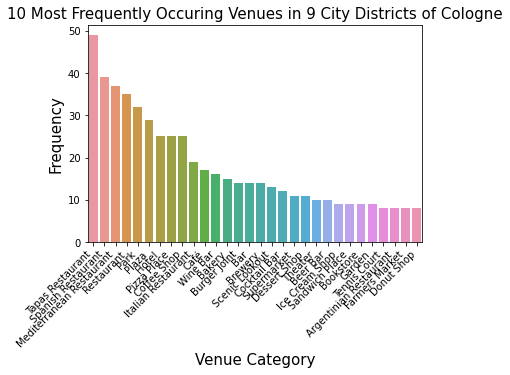

<Figure size 1800x1800 with 0 Axes>

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=BCN_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 9 City Districts of Cologne', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(25,25))
plt.show()

***4.- Explorar Barrios.***

In [23]:
BCN_Venues_n =BCN_venues.groupby(['Neighborhood'])['Venue Category'].count()

In [24]:
BCN_Venues_n

Neighborhood
Ciutat Vella           100
Eixample               100
Gràcia                   3
Horta - Guinardó       100
Les Corts              100
Nou Barris             100
Sant Andreu            100
Sant Martí             100
Sants-Montjuïc         100
Sarrià-Sant Gervasi     76
Name: Venue Category, dtype: int64

In [25]:
BCN_Venues_n_df  = BCN_Venues_n.to_frame().reset_index()
BCN_Venues_n_df.columns = ['Neighborhood', 'Number venues']
BCN_Venues_n_df.index = np.arange(1, len(BCN_Venues_n_df)+1)

list_rest_no =BCN_Venues_n_df['Number venues'].to_list()
list_dist =BCN_Venues_n_df['Neighborhood'].to_list()

In [26]:
BCN_Venues_n_df

,Neighborhood,Number venues
1,Ciutat Vella,100
2,Eixample,100
3,Gràcia,3
4,Horta - Guinardó,100
5,Les Corts,100
6,Nou Barris,100
7,Sant Andreu,100
8,Sant Martí,100
9,Sants-Montjuïc,100
10,Sarrià-Sant Gervasi,76


In [27]:
## RECUENTO POR BARRIO Y TIPO DE RESTAURANTE

In [28]:
# one hot encoding
BCN_onehot = pd.get_dummies(BCN_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BCN_onehot['Neighborhood'] = BCN_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BCN_onehot.columns[-1]] + list(BCN_onehot.columns[:-1])
BCN_onehot = BCN_onehot[fixed_columns]

BCN_onehot.head()

,Yoga Studio,Accessories Store,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Cafeteria,Café,Camera Store,Castle,Chinese Restaurant,Church,Climbing Gym,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Coworking Space,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doctor's Office,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Farmers Market,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Fountain,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Travel,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health Food Store,Hill,Historic Site,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,National Park,Neighborhood,Nightclub,Nudist Beach,Opera House,Organic Grocery,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pie Shop,Pier,Pizza Place,Planetarium,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stables,Stadium,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [29]:
# New dataframe size.
BCN_onehot.shape

(879, 162)

***5.- Agrupar categorias por dsitrito***

In [30]:
BCN_grouped = BCN_onehot.groupby('Neighborhood').mean().reset_index()
BCN_grouped

,Neighborhood,Yoga Studio,Accessories Store,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Cafeteria,Café,Camera Store,Castle,Chinese Restaurant,Church,Climbing Gym,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Coworking Space,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doctor's Office,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Farmers Market,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Fountain,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Travel,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health Food Store,Hill,Historic Site,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,National Park,Nightclub,Nudist Beach,Opera House,Organic Grocery,Paella Restaurant,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pie Shop,Pier,Pizza Place,Planetarium,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stables,Stadium,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery
0,Ciutat Vella,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.000000,0.00,0.010000,0.010000,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.03,0.00,0.00,0.00,0.000000,0.03,0.00,0.030000,0.01,0.01,0.00,0.000000,0.00,0.02,0.05,0.00,0.00,0.01,0.00,0.02,0.000000,0.00,0.00,0.00,0.02,0.00,0.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.00,0.00,0.00,0.00,0.01,0.00,0.000000,0.000000,0.00,0.00,0.00,0.01,0.00,0.000000,0.00,0.000000,0.070000,0.000000,0.010000,0.020000,0.01,0.00,0.04,0.010000,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.020000,0.01,0.00,0.00,0.010000,0.000000,0.01,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.01,0.00,0.00,0.00,0.000000,0.00,0.030000,0.00,0.000000,0.00,0.00,0.00,0.01,0.050000,0.00,0.040000,0.00,0.00,0.00,0.00,0.00,0.010000,0.01,0.00,0.00,0.00,0.01,0.010000,0.000000,0.00,0.01,0.00,0.00,0.00,0.000000,0.00,0.030000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.060000,0.00,0.000000,0.01,0.02,0.000000,0.010000,0.000000,0.000000,0.00,0.01,0.00,0.02,0.01,0.00
1,Eixample,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.000000,0.00,0.030000,0.010000,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.04,0.01,0.00,0.01,0.000000,0.03,0.00,0.010000,0.00,0.00,0.00,0.000000,0.00,0.01,0.07,0.00,0.01,0.01,0.00,0.01,0.010000,0.00,0.00,0.00,0.03,0.00,0.000000,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.000000,0.01,0.00,0.00,0.00,0.01,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.02,0.010000,0.00,0.000000,0.070000,0.000000,0.000000,0.020000,0.02,0.00,0.02,0.000000,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.050000,0.00,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.020000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.01,0.000000,0.01,0.000000,0.00,0.00,0.00,0.00,0.020000,0.00,0.020000,0.00,0.00,0.00,0.01,0.00,0.010000,0.01,0.00,0.01,0.00,0.01,0.000000,0.000000,0.00,0.01,0.00,0.00,0.00,0.

In [31]:
BCN_grouped.shape

(10, 162)

***6.- Buscamos los sitios más populares por distrito.***

In [32]:
num_top_venues = 20

for hood in BCN_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = BCN_grouped[BCN_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ciutat Vella----
                     venue  freq
0                    Hotel  0.07
1         Tapas Restaurant  0.06
2              Coffee Shop  0.05
3              Pizza Place  0.05
4       Italian Restaurant  0.04
5                    Plaza  0.04
6                Bookstore  0.03
7                     Park  0.03
8                     Café  0.03
9             Burger Joint  0.03
10              Donut Shop  0.03
11                Beer Bar  0.03
12      Spanish Restaurant  0.03
13                  Garden  0.02
14                  Market  0.02
15         Cultural Center  0.02
16            Cocktail Bar  0.02
17          Ice Cream Shop  0.02
18            Dessert Shop  0.02
19  Argentinian Restaurant  0.02


----Eixample----
                       venue  freq
0                Coffee Shop  0.07
1                      Hotel  0.07
2   Mediterranean Restaurant  0.05
3           Tapas Restaurant  0.05
4                  Bookstore  0.04
5               Dessert Shop  0.03
6                 Donu

In [33]:
#lo convertimos en un dataframe pivoteado

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BCN_grouped['Neighborhood']

for ind in np.arange(BCN_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BCN_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Hotel,Tapas Restaurant,Pizza Place,Coffee Shop,Plaza,Italian Restaurant,Beer Bar,Donut Shop,Spanish Restaurant,Bookstore
1,Eixample,Coffee Shop,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bookstore,Wine Bar,Dessert Shop,Donut Shop,Bakery,Burger Joint
2,Gràcia,Plaza,Mountain,Pedestrian Plaza,Ethiopian Restaurant,Furniture / Home Store,Fountain,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop
3,Horta - Guinardó,Spanish Restaurant,Plaza,Restaurant,Park,Tapas Restaurant,Mediterranean Restaurant,Scenic Lookout,Sandwich Place,Mountain,Soccer Field
4,Les Corts,Mediterranean Restaurant,Restaurant,Pizza Place,Japanese Restaurant,Spanish Restaurant,Café,Wine Bar,Cocktail Bar,Coffee Shop,Gastropub
5,Nou Barris,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Supermarket,Pizza Place,Burger Joint,Brewery,Performing Arts Venue,Mediterranean Restaurant
6,Sant Andreu,Tapas Restaurant,Restaurant,Plaza,Spanish Restaurant,Park,Brewery,Mediterranean Restaurant,Pizza Place,Farmers Market,Italian Restaurant
7,Sant Martí,Park,Italian Restaurant,Mediterranean Restaurant,Restaurant,Beach,Bakery,Brewery,Historic Site,Spanish Restaurant,Supermarket
8,Sants-Montjuïc,Tapas Restaurant,Park,Wine Bar,Pizza Place,Italian Restaurant,Scenic Lookout,Café,Cocktail Bar,Coffee Shop,Beer Bar
9,Sarrià-Sant Gervasi,Scenic Lookout,Theme Park,Mediterranean Restaurant,Spanish Restaurant,Park,Tapas Restaurant,Restaurant,Train Station,Trail,Theme Park Ride / Attraction



# PARTE 3 : AGRUPAMOS LOS DATOS


*** 1.-Calculamos k-means***

In [36]:
# set number of clusters (I choose 5)
kclusters = 5
BCN_grouped_clustering = BCN_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BCN_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 1, 3, 0, 2, 2, 0, 0, 3], dtype=int32)

*** 2.-Introducimos los clusteres en el df***

In [37]:
BCN_merged = df
BCN_merged.head(3)

,Distrito,Superficie km²[1]​,Población (2019)[2]​,Latitude,Longitude
0,Ciutat Vella,411,103 429,41.374985,2.173277
1,Eixample,746,265 910,41.393689,2.163655
2,Sants-Montjuïc,2268,184 091,41.364762,2.154233


In [38]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
neighborhoods_venues_sorted_w_clusters.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Hotel,Tapas Restaurant,Pizza Place,Coffee Shop,Plaza,Italian Restaurant,Beer Bar,Donut Shop,Spanish Restaurant,Bookstore
1,Eixample,Coffee Shop,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bookstore,Wine Bar,Dessert Shop,Donut Shop,Bakery,Burger Joint
2,Gràcia,Plaza,Mountain,Pedestrian Plaza,Ethiopian Restaurant,Furniture / Home Store,Fountain,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop


In [39]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [40]:
neighborhoods_venues_sorted_w_clusters.head(23)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Ciutat Vella,Hotel,Tapas Restaurant,Pizza Place,Coffee Shop,Plaza,Italian Restaurant,Beer Bar,Donut Shop,Spanish Restaurant,Bookstore
1,4,Eixample,Coffee Shop,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bookstore,Wine Bar,Dessert Shop,Donut Shop,Bakery,Burger Joint
2,1,Gràcia,Plaza,Mountain,Pedestrian Plaza,Ethiopian Restaurant,Furniture / Home Store,Fountain,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop
3,3,Horta - Guinardó,Spanish Restaurant,Plaza,Restaurant,Park,Tapas Restaurant,Mediterranean Restaurant,Scenic Lookout,Sandwich Place,Mountain,Soccer Field
4,0,Les Corts,Mediterranean Restaurant,Restaurant,Pizza Place,Japanese Restaurant,Spanish Restaurant,Café,Wine Bar,Cocktail Bar,Coffee Shop,Gastropub
5,2,Nou Barris,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Supermarket,Pizza Place,Burger Joint,Brewery,Performing Arts Venue,Mediterranean Restaurant
6,2,Sant Andreu,Tapas Restaurant,Restaurant,Plaza,Spanish Restaurant,Park,Brewery,Mediterranean Restaurant,Pizza Place,Farmers Market,Italian Restaurant
7,0,Sant Martí,Park,Italian Restaurant,Mediterranean Restaurant,Restaurant,Beach,Bakery,Brewery,Historic Site,Spanish Restaurant,Supermarket
8,0,Sants-Montjuïc,Tapas Restaurant,Park,Wine Bar,Pizza Place,Italian Restaurant,Scenic Lookout,Café,Cocktail Bar,Coffee Shop,Beer Bar
9,3,Sarrià-Sant Gervasi,Scenic Lookout,Theme Park,Mediterranean Restaurant,Spanish Restaurant,Park,Tapas Restaurant,Restaurant,Train Station,Trail,Theme Park Ride / Attraction


*** 3.- Juntamos dfs para introducir coordenadas***

In [41]:
BCN_merged.rename(columns={'Distrito':'Neighborhood'}, inplace=True)

BCN_merged = BCN_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

BCN_merged.head(10)

,Neighborhood,Superficie km²[1]​,Población (2019)[2]​,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,411,103 429,41.374985,2.173277,4,Hotel,Tapas Restaurant,Pizza Place,Coffee Shop,Plaza,Italian Restaurant,Beer Bar,Donut Shop,Spanish Restaurant,Bookstore
1,Eixample,746,265 910,41.393689,2.163655,4,Coffee Shop,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bookstore,Wine Bar,Dessert Shop,Donut Shop,Bakery,Burger Joint
2,Sants-Montjuïc,2268,184 091,41.364762,2.154233,0,Tapas Restaurant,Park,Wine Bar,Pizza Place,Italian Restaurant,Scenic Lookout,Café,Cocktail Bar,Coffee Shop,Beer Bar
3,Les Corts,602,81 974,41.385244,2.132863,0,Mediterranean Restaurant,Restaurant,Pizza Place,Japanese Restaurant,Spanish Restaurant,Café,Wine Bar,Cocktail Bar,Coffee Shop,Gastropub
4,Sarrià-Sant Gervasi,1991,149 260,41.413039,2.107620,3,Scenic Lookout,Theme Park,Mediterranean Restaurant,Spanish Restaurant,Park,Tapas Restaurant,Restaurant,Train Station,Trail,Theme Park Ride / Attraction
5,Gràcia,419,121 798,38.995368,21.987713,1,Plaza,Mountain,Pedestrian Plaza,Ethiopian Restaurant,Furniture / Home Store,Fountain,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop
6,Horta - Guinardó,1196,171 495,41.428556,2.143617,3,Spanish Restaurant,Plaza,Restaurant,Park,Tapas Restaurant,Mediterranean Restaurant,Scenic Lookout,Sandwich Place,Mountain,Soccer Field
7,Nou Barris,805,170 669,41.445815,2.179801,2,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Supermarket,Pizza Place,Burger Joint,Brewery,Performing Arts Venue,Mediterranean Restaurant
8,Sant Andreu,659,149 821,41.437439,2.196859,2,Tapas Restaurant,Restaurant,Plaza,Spanish Restaurant,Park,Brewery,Mediterranean Restaurant,Pizza Place,Farmers Market,Italian Restaurant
9,Sant Martí,1039,238 315,41.406782,2.203655,0,Park,Italian Restaurant,Mediterranean Restaurant,Restaurant,Beach,Bakery,Brewery,Historic Site,Spanish Restaurant,Supermarket


*** 4.- Visualziamos el mapa ***

In [42]:
import matplotlib.cm as cm
import matplotlib.colors as colors

BCN_merged_nonan = BCN_merged.dropna(subset=['Cluster Labels'])
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,   cluster in zip(BCN_merged_nonan['Latitude'], BCN_merged_nonan['Longitude'], BCN_merged_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters)
        
map_clusters

### Parte 4: EVALUACIÓN CLUSTERS

***1.- Examinamos los clusters.***

Examinamos y damos nombre a cada cluster basandonos en sus características.

***Cluster 1***

In [43]:
BCN_merged.loc[BCN_merged['Cluster Labels'] == 0, BCN_merged.columns[[1] + list(range(5, BCN_merged.shape[1]))]]

,Superficie km²[1]​,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,2268,0,Tapas Restaurant,Park,Wine Bar,Pizza Place,Italian Restaurant,Scenic Lookout,Café,Cocktail Bar,Coffee Shop,Beer Bar
3,602,0,Mediterranean Restaurant,Restaurant,Pizza Place,Japanese Restaurant,Spanish Restaurant,Café,Wine Bar,Cocktail Bar,Coffee Shop,Gastropub
9,1039,0,Park,Italian Restaurant,Mediterranean Restaurant,Restaurant,Beach,Bakery,Brewery,Historic Site,Spanish Restaurant,Supermarket


RESTAURANTES TEMÁTICOS, BARES

***Cluster 2***

In [45]:
BCN_merged.loc[BCN_merged['Cluster Labels'] == 1, BCN_merged.columns[[1] + list(range(5, BCN_merged.shape[1]))]]

,Superficie km²[1]​,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,419,1,Plaza,Mountain,Pedestrian Plaza,Ethiopian Restaurant,Furniture / Home Store,Fountain,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop


PLAZAS, MONTAÑAS

***Cluster 3***

In [46]:
BCN_merged.loc[BCN_merged['Cluster Labels'] == 2, BCN_merged.columns[[1] + list(range(5, BCN_merged.shape[1]))]]

,Superficie km²[1]​,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,805,2,Tapas Restaurant,Spanish Restaurant,Plaza,Restaurant,Supermarket,Pizza Place,Burger Joint,Brewery,Performing Arts Venue,Mediterranean Restaurant
8,659,2,Tapas Restaurant,Restaurant,Plaza,Spanish Restaurant,Park,Brewery,Mediterranean Restaurant,Pizza Place,Farmers Market,Italian Restaurant


TAPAS

***Cluster 4***

In [47]:
BCN_merged.loc[BCN_merged['Cluster Labels'] == 3, BCN_merged.columns[[1] + list(range(5, BCN_merged.shape[1]))]]

,Superficie km²[1]​,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,1991,3,Scenic Lookout,Theme Park,Mediterranean Restaurant,Spanish Restaurant,Park,Tapas Restaurant,Restaurant,Train Station,Trail,Theme Park Ride / Attraction
6,1196,3,Spanish Restaurant,Plaza,Restaurant,Park,Tapas Restaurant,Mediterranean Restaurant,Scenic Lookout,Sandwich Place,Mountain,Soccer Field


OCIO, RESTAURANTE ESPAÑOL

***Cluster 5***

In [48]:
BCN_merged.loc[BCN_merged['Cluster Labels'] == 4, BCN_merged.columns[[1] + list(range(5, BCN_merged.shape[1]))]]

,Superficie km²[1]​,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,411,4,Hotel,Tapas Restaurant,Pizza Place,Coffee Shop,Plaza,Italian Restaurant,Beer Bar,Donut Shop,Spanish Restaurant,Bookstore
1,746,4,Coffee Shop,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bookstore,Wine Bar,Dessert Shop,Donut Shop,Bakery,Burger Joint


HOTELEs, CAFFES, TIENDAS